# KAGGLE BIKE DATA SET EDA

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
import pandas as pd

bike_df=pd.read_csv('train.csv')

In [5]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Type

### Numercial Type

- temp - temperature in Celsius == actual temperature

- atemp - "feels like" temperature in Celsius == body temperature

- humidity - relative humidity

- windspeed - wind speed

- casual - number of non-registered user rentals initiated

- registered - number of registered user rentals initiated

- count - number of total rentals: casual + registered


### Categorized Type

- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

- weather - 1: Sunny, 2: Cloudy, 3: Light Rain or Snow, 4: Severe Weather

#### Categorized Type - 0/1 Binary Type

- holiday - whether the day is considered a holiday 0: No, 1: Yes

- workingday - whether the day is neither a weekend nor holiday 0: No, 1: Yes


### Time Series

- datetime - hourly date + timestamp  

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

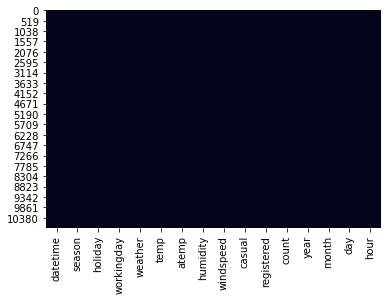

In [49]:
%matplotlib inline
sns.heatmap(bike_df.isnull(), cbar=False)

#### seaborn에서 제공하는 heatmap 함수는 결측치를 시각화해 준다.
결측치가 있다면 베이지색 선이 나타난다.
이 데이터에서는 어느 곳에도 선이 나타나지 않으므로 결측치가 없다는 사실을 알 수 있다.

- null value는 없으므로 결손 데이터 처리를 해 주지 않아도 된다.

### Time Data Split 
datetime data는 year, month, day, hour로 이루어져 있으므로 각 column들을 추가해 준다.

In [9]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [10]:
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


# Data Analysis

#### seaborn heatmap을 이용하여 히트맵을 그릴 수 있다.
히트맵을 이용하여 어느 변수 간의 상관관계가 눈에 띄는지 알 수 있다.

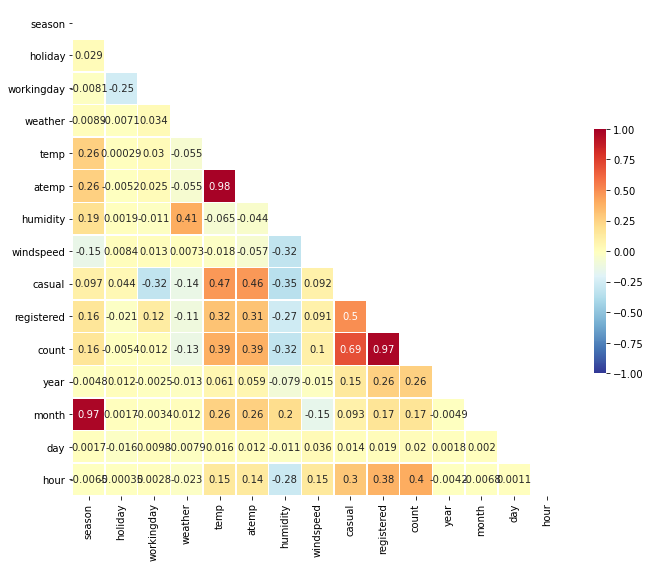

In [52]:
import numpy as np
df = bike_df.corr()
fig, ax = plt.subplots( figsize=(11,9) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, cmap = 'RdYlBu_r', annot = True,
            mask=mask, linewidths=.5,
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.show()

- 히트맵을 그려 본 결과, "count-registered" 두 변수 사이에 강한 상관 관계가 있음을 알 수 있다.

count는 registered와 casual의 합이다. registered와 0.97의 상관관계를 가지므로, 자전거는 대체적으로 예약한 사람이 빌리는 비율이 일반적임을 알 수 있다.
- temp와 atemp는 0.98의 상관 관계를 가진다. (당연)
- season과 month는 0.97로 유의미한 상관 관계를 가진다. (당연)

## Time Series Data

각 변수를 x축으로 놓고, y축은 count, registered, casual 세 개로 시각화해 보았다.
- registered과 casual의 그래프를 비교해 보았을 때 registered 그래프의 y축의 범위가 casual 그래프의 y축의 범위보다 압도적으로 크다.

### Year Data

<AxesSubplot:xlabel='year', ylabel='casual'>

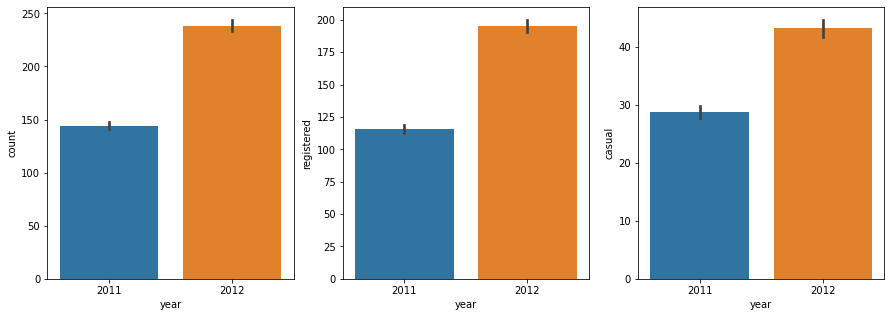

In [109]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

plt.subplot(1, 3, 1)
sns.barplot(x="year",y="count",data=bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x="year",y="registered",data=bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x="year",y="casual",data=bike_df)

2011년의 데이터보다 2012년의 데이터가 전반적으로 count 값이 높다.

### Month Data

<AxesSubplot:xlabel='month', ylabel='casual'>

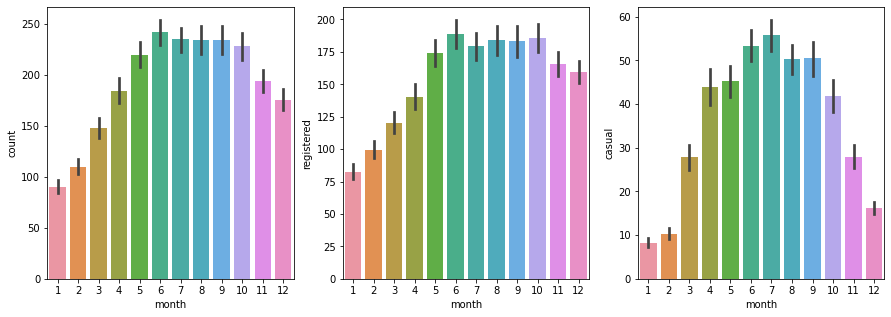

In [108]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

plt.subplot(1, 3, 1)
sns.barplot(x="month",y="count",data=bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x="month",y="registered",data=bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x="month",y="casual",data=bike_df)

- month-count 함수에서, 그래프는 오른쪽 꼬리 부분이 절단된 정규분포 모양과 유사하다.
- month-count 함수와 month-registered 함수의 모양은 거의 비슷하다.
- month-casual 함수의 경우 정규분포의 모양을 띈다.

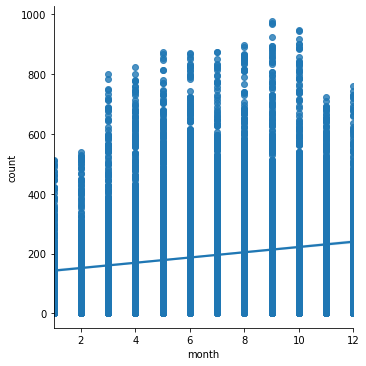

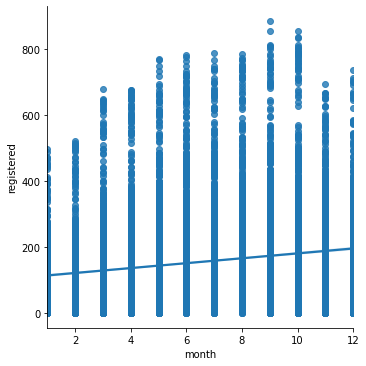

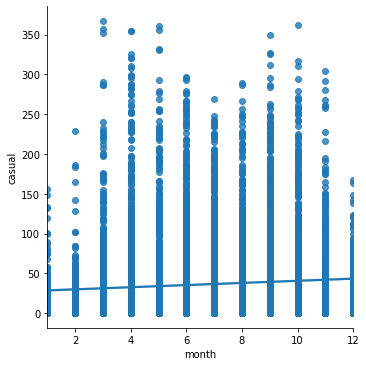

In [88]:
sns.lmplot(x="month",y="count",data=bike_df)
sns.lmplot(x="month",y="registered",data=bike_df)
sns.lmplot(x="month",y="casual",data=bike_df)

산점도 함수를 그려 보았다.
- 역시나 month-count 함수와 month-registered 함수는 매우 유사한 분포를 띈다.
- 다만, month-casual 함수는 각 month마다 casual 값이 하위에 몰려 있고, casual 값이 높은 값은 비교적 분포되어 있음을 알 수 있다.

### Day Data

<AxesSubplot:xlabel='day', ylabel='casual'>

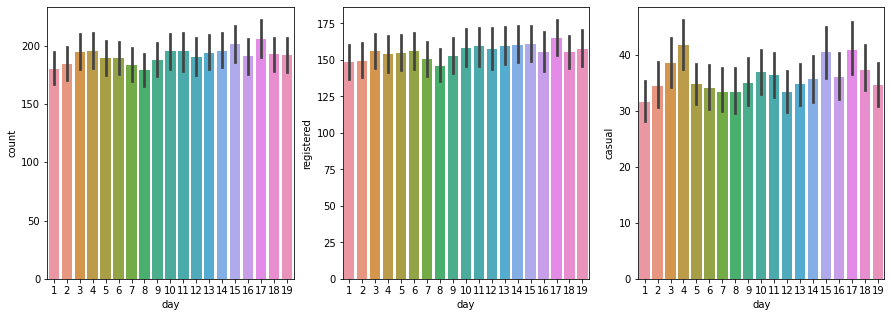

In [72]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

plt.subplot(1, 3, 1)
sns.barplot(x="day",y="count",data=bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x="day",y="registered",data=bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x="day",y="casual",data=bike_df)

- 마찬가지로 day-count 그래프와 day-registered 그래프는 함께 간다.
- day-casual 그래프의 경우, y축이 대체적으로 day-registered 그래프의 1/4배 이하이므로 역시나 전체적인 count에 미치는 영향이 작음을 알 수 있다.

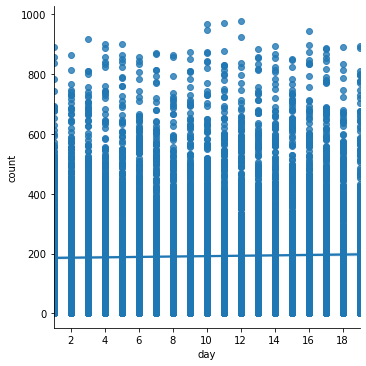

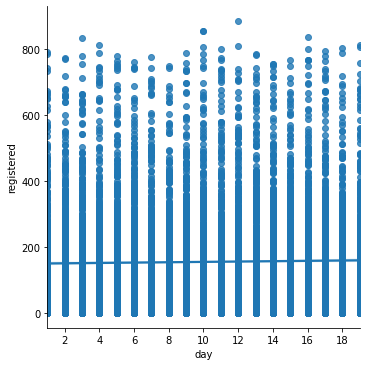

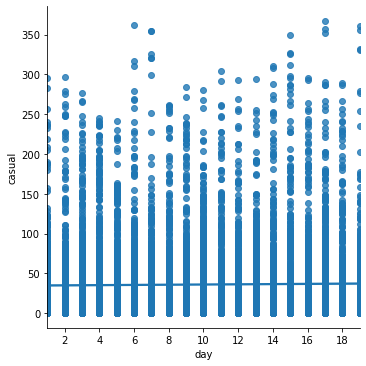

In [92]:
sns.lmplot(x="day",y="count",data=bike_df)
sns.lmplot(x="day",y="registered",data=bike_df)
sns.lmplot(x="day",y="casual",data=bike_df)

- 세 그래프 모두 전반적으로 비슷한 모양을 가진다.

### Hour Data

<AxesSubplot:xlabel='hour', ylabel='casual'>

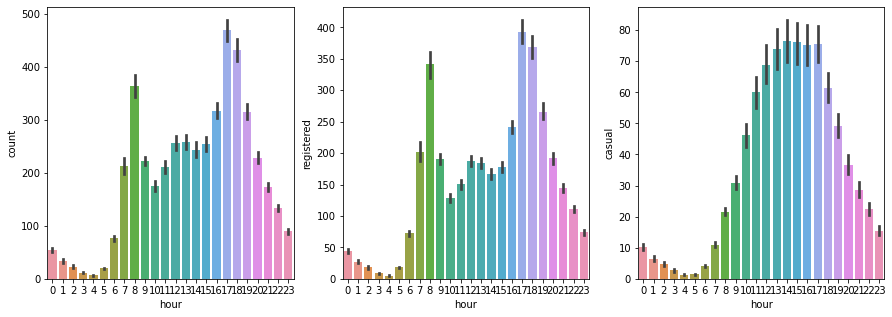

In [93]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

plt.subplot(1, 3, 1)
sns.barplot(x="hour",y="count",data=bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x="hour",y="registered",data=bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x="hour",y="casual",data=bike_df)

hour-count 그래프와 hour-registered 그래프
- 피크: 16시~19시 / 8시
- 꾸준히 유지: 19시~23시
- 전멸 구간: 0~6시

- hour-count 그래프와 hour-registered 그래프는 함께 간다.
- 다만, hour-casual 그래프는 15-19시가 피크로, 정규분포와 유사한 그래프를 가진다.

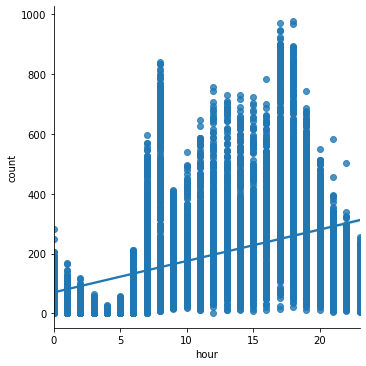

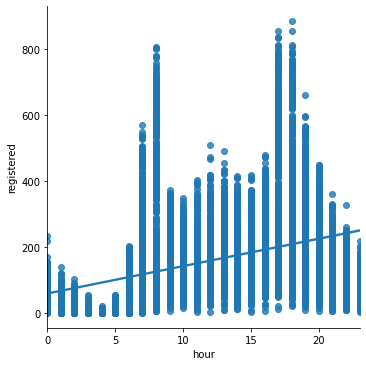

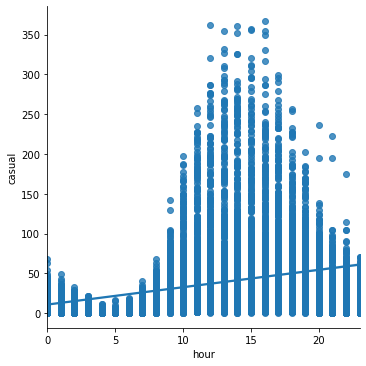

In [94]:
sns.lmplot(x="hour",y="count",data=bike_df)
sns.lmplot(x="hour",y="registered",data=bike_df)
sns.lmplot(x="hour",y="casual",data=bike_df)

### Time Series Type 결론
- count 그래프와 registered 그래프는 모두 같은 양상을 띈다.
- registered 그래프의 y축에 비해 casual 그래프의 y축이 작은 편이다.
#### Time Series Type Data에서, casual/registered의 구분을 없애도 제대로 분류할 수 있을까?

# Categorized Type

<AxesSubplot:xlabel='holiday', ylabel='count'>

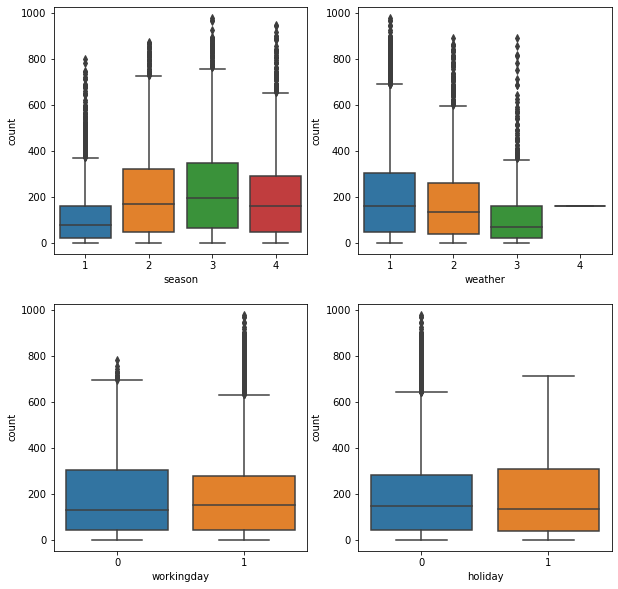

In [14]:
figure, axes = plt.subplots(2,2)
figure.set_size_inches(10, 10)

plt.subplot(2,2,1)
sns.boxplot(x='season',y='count',data=bike_df)
plt.subplot(2,2,2)
sns.boxplot(x='weather',y='count',data=bike_df)
plt.subplot(2,2,3)
sns.boxplot(x='workingday',y='count',data=bike_df)
plt.subplot(2,2,4)
sns.boxplot(x='holiday',y='count',data=bike_df)

boxplot 그래프로 사분위 그래프의 양상을 확인해 본다.
- workingday, holiday는 유의미한 차이가 나타나지 않는다.
- season과 weather에서는 유의미한 차이가 나타난다.
#### season
season의 경우에는, 평균적으로 가을>여름>가을>>봄 의 순서로 count가 높은 것을 볼 수 있다.
#### weather
weather의 경우에는, 맑은 날과 다음으로 맑은 날 두 카테고리에서 count가 비슷하게 크다.
흐린 날은 다른 두 날과 비교하여 눈에 띄게 자전거 사용률이 줄었다.
날씨가 최악으로 안 좋은 날은 count가 거의 없었다.
weather == 4일 때의 데이터가 이상치인지 아닌지를 주의깊게 보아야 한다.

## use barplot

<AxesSubplot:xlabel='season', ylabel='casual'>

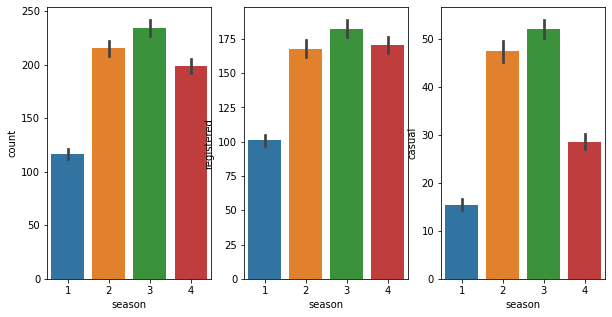

In [96]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(10, 5)

plt.subplot(1, 3, 1)
sns.barplot(x = "season", y = "count", data = bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x = "season", y = "registered", data = bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x = "season", y = "casual", data = bike_df)

- season-count 그래프, season-registered 그래프, season-casual 그래프 이 세 가지 경우 모두 (정도의 차이는 있으나) 3 > 2 > 4 >> 1 의 모양을 띈다.

<AxesSubplot:xlabel='weather', ylabel='casual'>

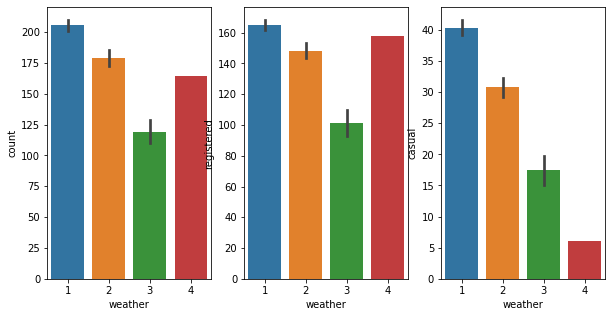

In [97]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(10, 5)

plt.subplot(1, 3, 1)
sns.barplot(x = "weather", y = "count", data = bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x = "weather", y = "registered", data = bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x = "weather", y = "casual", data = bike_df)

- weather-count 그래프와 weather-registered 그래프의 모양이 같이 간다.
- 두 그래프에서는 1 > 2 > 4 >> 3


- weather-casual 그래프는 y축이 weather-registered 그래프의 1/4 배이다.
- 이 그래프에서는 1 > 2 > 3 >> 4

<AxesSubplot:xlabel='workingday', ylabel='casual'>

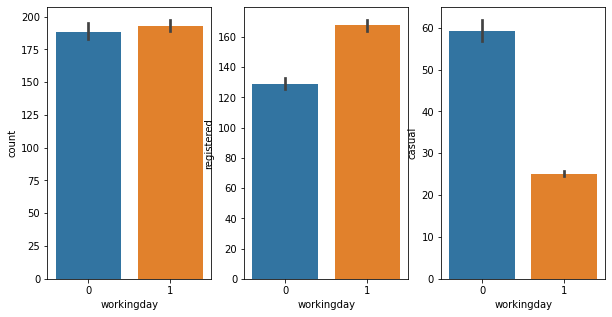

In [98]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(10, 5)

plt.subplot(1, 3, 1)
sns.barplot(x = "workingday", y = "count", data = bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x = "workingday", y = "registered", data = bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x = "workingday", y = "casual", data = bike_df)

이 그래프는 registered graph와 casual graph와 count graph의 양상이 다른 처음의 그래프이다.

- workingday-count 그래프: 0/1 사이의 차이가 거의 없다.
- workingday-registered 그래프: 0 < 1
- workingday-casual 그래프: 0 >>>> 1

registered 그래프와 casual 그래프의 양상이 다르게 나타난다.

<AxesSubplot:xlabel='holiday', ylabel='casual'>

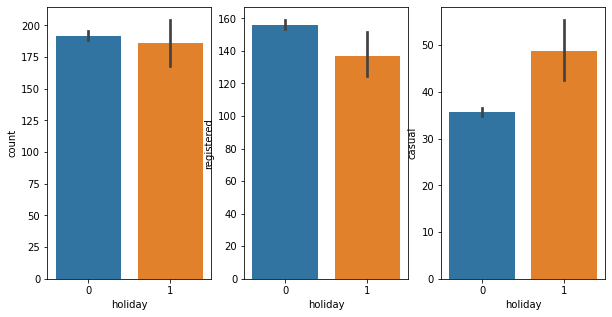

In [99]:
figure, axes = plt.subplots(1, 3)
figure.set_size_inches(10, 5)

plt.subplot(1, 3, 1)
sns.barplot(x = "holiday", y = "count", data = bike_df)
plt.subplot(1, 3, 2)
sns.barplot(x = "holiday", y = "registered", data = bike_df)
plt.subplot(1, 3, 3)
sns.barplot(x = "holiday", y = "casual", data = bike_df)

이 그래프도 workingday 그래프와 비슷한 양상을 띈다. 다만 극단적인 면이 조금 완화된 면을 보여 준다.

- holiday-count 그래프: 0/1 차이가 거의 없다.
- holiday-registered 그래프: 0 > 1
- holiday-casual 그래프: 0 << 1

registered 그래프와 casual 그래프의 양상이 다르게 나타난다.

### Categorized Type 결론
- season: 세 그래프 모두 비슷한 양상을 띈다. 1이 눈에 띄게 적다.
- weather: regis 그래프와 count 그래프는 같다. casual 그래프는 다른 양상을 띈다.
- workingday, holiday: 전체 그래프에서는 0/1 사이에 유의미한 차이는 나타나지 않았으나, regis와 casual로 나누어 보았을 때는 유의미한 차이가 보였다.
#### 이 차이들을 어떻게 데이터 분석적 측면에서 이야기할 수 있을까?

# Numercial Type

### temp

<AxesSubplot:xlabel='temp', ylabel='casual'>

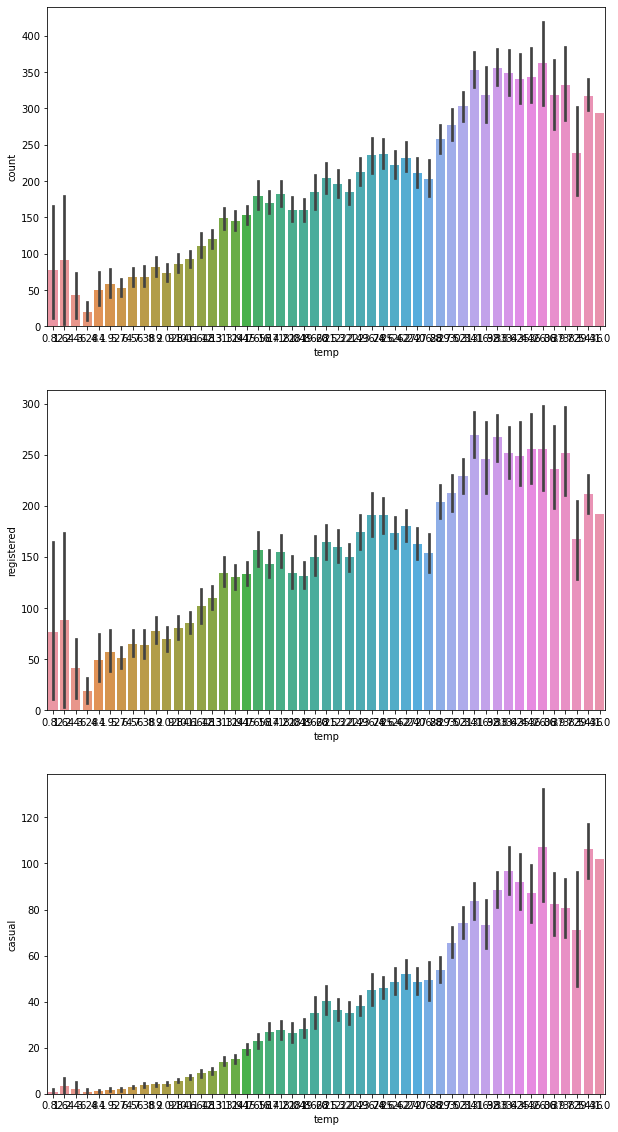

In [100]:
figure, axes = plt.subplots(3, 1)
figure.set_size_inches(10, 20)

plt.subplot(3, 1, 1)
sns.barplot(x = "temp", y = "count", data = bike_df)
plt.subplot(3, 1, 2)
sns.barplot(x = "temp", y = "registered", data = bike_df)
plt.subplot(3, 1, 3)
sns.barplot(x = "temp", y = "casual", data = bike_df)

temp-count 그래프와 temp-registered 그래프가 비슷한 양상을 띈다. temp-casual 그래프는 다소 다른 양상을 띄나, temp가 올라갈수록 대체적으로 casual이 비례쩍으로 높아지는 양상을 띈다.

### atemp

<AxesSubplot:xlabel='atemp', ylabel='casual'>

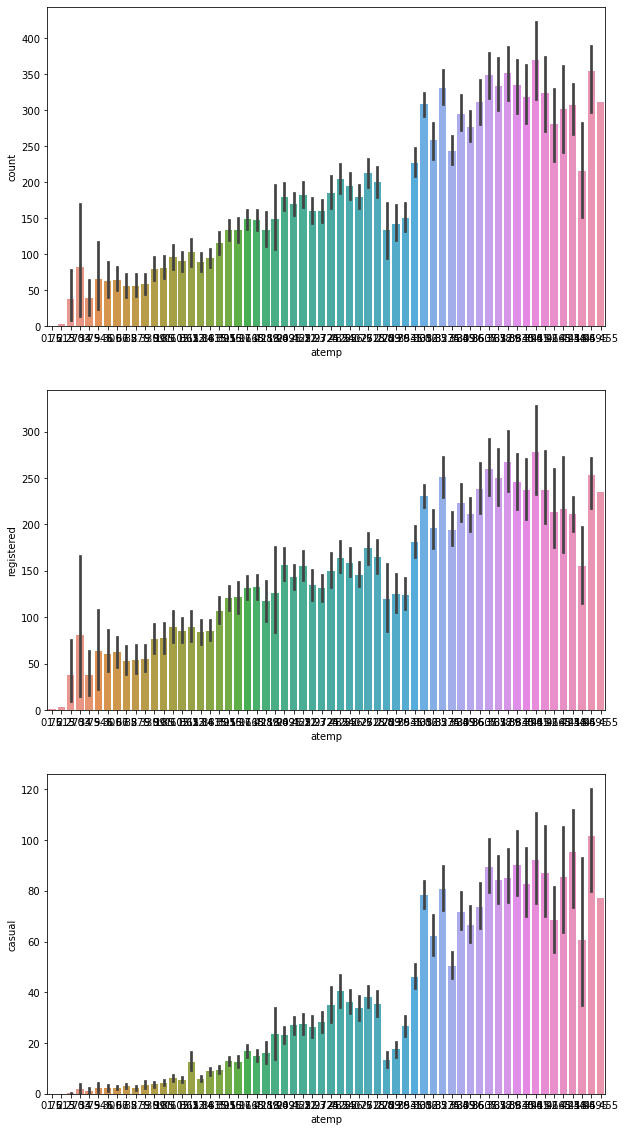

In [101]:
figure, axes = plt.subplots(3, 1)
figure.set_size_inches(10, 20)

plt.subplot(3, 1, 1)
sns.barplot(x = "atemp", y = "count", data = bike_df)
plt.subplot(3, 1, 2)
sns.barplot(x = "atemp", y = "registered", data = bike_df)
plt.subplot(3, 1, 3)
sns.barplot(x = "atemp", y = "casual", data = bike_df)

atemp도 temp와 마찬가지의 양상을 띈다.

### Humidity

<AxesSubplot:xlabel='humidity', ylabel='casual'>

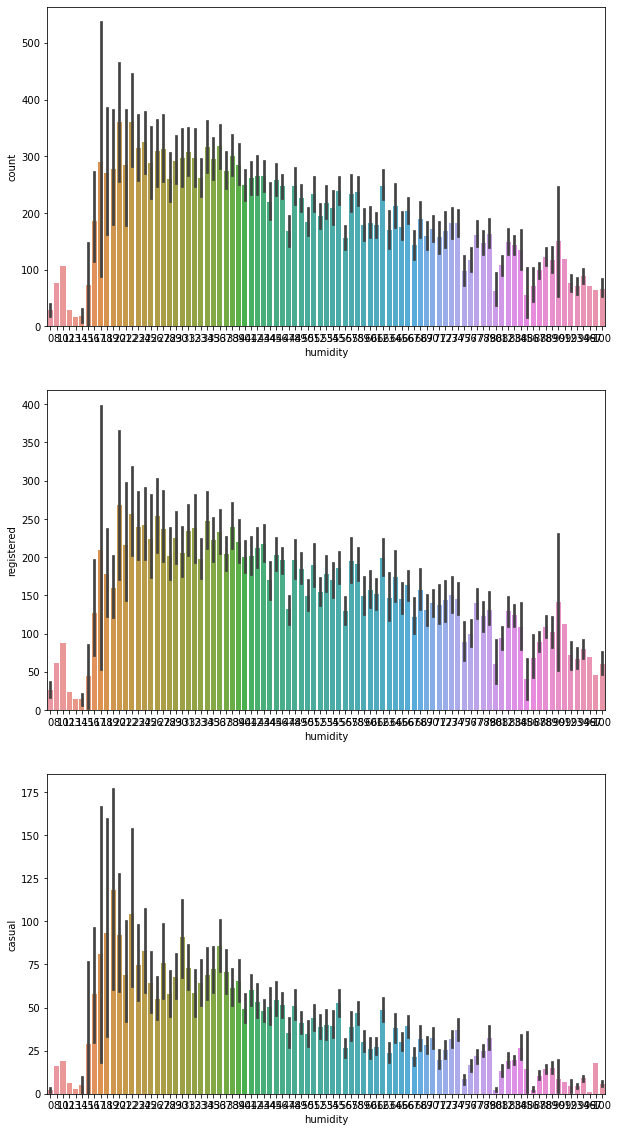

In [103]:
figure, axes = plt.subplots(3, 1)
figure.set_size_inches(10, 20)

plt.subplot(3, 1, 1)
sns.barplot(x = "humidity", y = "count", data = bike_df)
plt.subplot(3, 1, 2)
sns.barplot(x = "humidity", y = "registered", data = bike_df)
plt.subplot(3, 1, 3)
sns.barplot(x = "humidity", y = "casual", data = bike_df)

humidity-count, humidity-registered, humidity-casual 그래프 모두 비슷한 양상을 띈다.

### Windspeed

<AxesSubplot:xlabel='windspeed', ylabel='registered'>

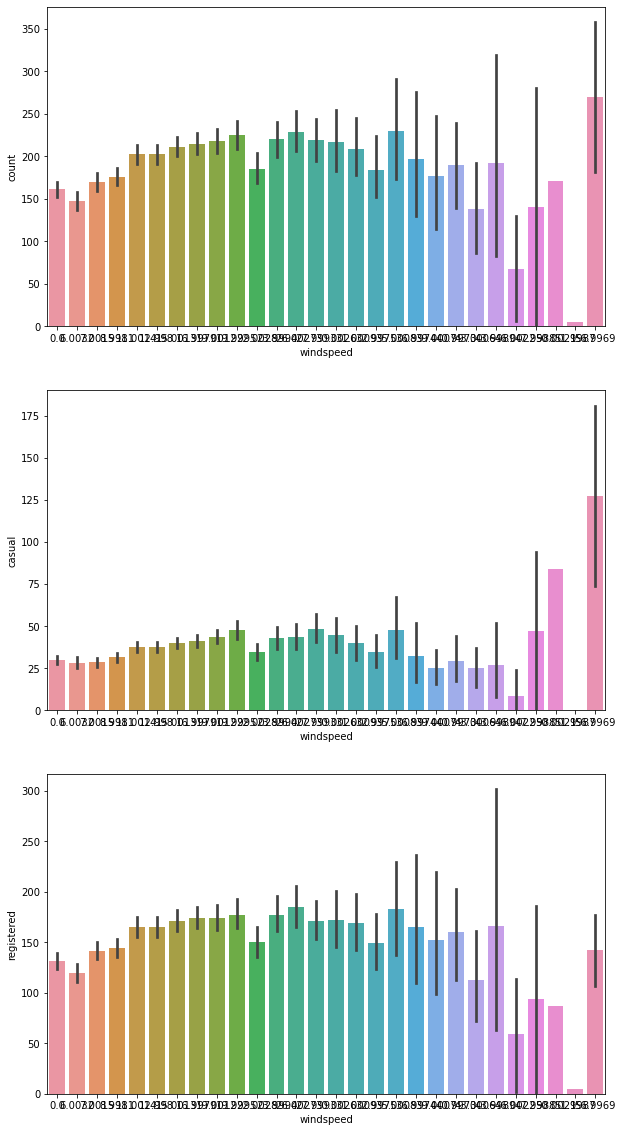

In [35]:
figure, axes = plt.subplots(3, 1)
figure.set_size_inches(10, 20)

plt.subplot(3, 1, 1)
sns.barplot(x = "windspeed", y = "count", data = bike_df)
plt.subplot(3, 1, 2)
sns.barplot(x = "windspeed", y = "casual", data = bike_df)
plt.subplot(3, 1, 3)
sns.barplot(x = "windspeed", y = "registered", data = bike_df)

Windspeed도 비슷한 양상을 띈다.

## 결론
- count, casual, registered 셋의 연관성을 중심으로 EDA를 진행하였다.
- count와 registered는 함께 가는 면이 있지만 casual은 상이한 양상을 띄는 경우가 많았다.
따라서 registered와 casual을 따로 분석하여 계산 후, 결론 과정에서 둘을 합쳐 count를 도출하는 방법은 어떨까? 하는 생각을 가지게 되었다.

## 개선 방향
- 너무나 수치적 방향으로 생각하였기 때문에, 스토리텔링 형식으로 "분석"을 하는 면이 필요할 것 같다.
- sns 함수의 특성을 알고, 그것을 잘 활용하는 것이 중요함을 느끼었다.